In [1]:
# %%capture
# !pip install -U pandasql
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
#import xlrd


# Clienti

In [2]:
dfClienti = pd.read_excel('RawDatasets/Clienti.xlsx')

print(dfClienti)

dfClienti.to_csv('dfClienti.csv')


        Nr.  Cod. condizioni pagam.  Fatt. cumulative  Valuta
0    C00001                     101             False       1
1    C00003                     102             False       2
2    C00004                     102             False       3
3    C00005                     112             False       1
4    C00006                     101             False       2
..      ...                     ...               ...     ...
103  C00512                     100             False       2
104  C00513                     101             False       3
105  C00514                     101             False       1
106  C00515                     101             False       2
107  C90001                     101             False       3

[108 rows x 4 columns]


In [5]:
#1: Euro
indice1 = dfClienti.loc[dfClienti.Valuta == 1, :]

indice1.insert(loc=4, column='Valuta',
               value='Euro', allow_duplicates=True)

#2: Dollaro
indice2 = dfClienti.loc[dfClienti.Valuta == 2, :]

indice2.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)


#3: Yen
indice3 = dfClienti.loc[dfClienti.Valuta == 3, :]

indice3.insert(loc=4, column='Valuta',
               value='Dollaro', allow_duplicates=True)

#Unione delle sottotabelle
union = pd.concat([indice1, indice2, indice3])

print(union)

union.to_csv('dfClienti.csv')


        Nr.  Cod. condizioni pagam.  Fatt. cumulative Valuta   Valuta
0    C00001                     101             False      1     Euro
3    C00005                     112             False      1     Euro
6    C00008                     101             False      1     Euro
9    C00011                     101             False      1     Euro
12   C00017                     101             False      1     Euro
..      ...                     ...               ...    ...      ...
95   C00504                     120             False      3  Dollaro
98   C00507                     101             False      3  Dollaro
101  C00510                     101             False      3  Dollaro
104  C00513                     101             False      3  Dollaro
107  C90001                     101             False      3  Dollaro

[108 rows x 5 columns]


<AxesSubplot:ylabel='Count'>

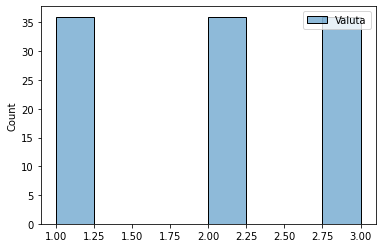

In [17]:
sns.histplot(union.Valuta)


# Consumi

In [6]:
dfConsumi = pd.read_excel('RawDatasets/Consumi.xlsx')

del dfConsumi["Tipo movimento"]
del dfConsumi["Tipo origine"]

print(dfConsumi)
dfConsumi.to_csv('dfConsumi.csv')


      Nr. movimento Budget/cons   Codice MP Nr articolo Nr. documento  \
0             21684      BUDGET  ART0001929  ART0000788   ODP16-16812   
1             21685      BUDGET  ART0001820  ART0000788   ODP16-16812   
2             21686      BUDGET  ART0005137  ART0000788   ODP16-16812   
3             21687      BUDGET  ART0005138  ART0000788   ODP16-16812   
4             21688      BUDGET  ART0005139  ART0000788   ODP16-16812   
...             ...         ...         ...         ...           ...   
4514          67895  CONSUNTIVO  ART0005394  ART0002962   ODP19-06418   
4515          67896  CONSUNTIVO  ART0005394  ART0002963   ODP19-06418   
4516          67925  CONSUNTIVO  ART0005399  ART0000889   ODP19-06659   
4517          67926  CONSUNTIVO  ART0005327  ART0000889   ODP19-06659   
4518          68013  CONSUNTIVO  ART0005922  ART0000891   ODP19-06659   

      Quantità MP impiegata  Importo costo (TOTALE)  
0                       1.0                  126.01  
1              

# Costo orario risorse - budget

In [7]:
dfCostoOrario = pd.read_excel('RawDatasets/Costo orario risorse - budget.xlsx')

print(dfCostoOrario)
dfCostoOrario.to_csv('dfCostoOrario.csv')


   Risorsa Area di produzione  Costo orario (€/h)
0     RIS1                A10                51.0
1     RIS1                A11                51.0
2     RIS1                A20                68.0
3     RIS1                A30                68.0
4     RIS1                A32                51.0
..     ...                ...                 ...
65    RIS9                A11                42.5
66    RIS9                A20                68.0
67    RIS9                A30                42.5
68    RIS9                A32                42.5
69    RIS9                A40                42.5

[70 rows x 3 columns]


# Costo orario risorse - consuntivo

In [8]:
dfConsuntivo = pd.read_excel(
    'RawDatasets/Costo orario risorse - consuntivo.xlsx')

print(dfConsuntivo)
dfConsuntivo.to_csv('dfConsuntivo.csv')


   Risorsa Area di produzione  Costo orario (€/h)
0     RIS1                A10                  60
1     RIS1                A11                  60
2     RIS1                A20                  80
3     RIS1                A30                  80
4     RIS1                A32                  60
..     ...                ...                 ...
65    RIS9                A11                  50
66    RIS9                A20                  80
67    RIS9                A30                  50
68    RIS9                A32                  50
69    RIS9                A40                  50

[70 rows x 3 columns]


# Impiego orario risorse

In [9]:
dfImpiegoRisorse = pd.read_excel('RawDatasets/Impiego orario risorse.xlsx')

print(dfImpiegoRisorse)

dfImpiegoRisorse.to_csv('dfImpiegoRisorse.csv')


     nr articolo budget/consuntivo Nr. Ordine di produzione  \
0     ART0000788            BUDGET              ODP16-16812   
1     ART0000756            BUDGET              ODP16-15232   
2     ART0000772            BUDGET              ODP16-15712   
3     ART0000762            BUDGET              ODP16-14704   
4     ART0000762            BUDGET              ODP16-14704   
...          ...               ...                      ...   
6259  ART0000889        CONSUNTIVO              ODP19-06659   
6260  ART0000889        CONSUNTIVO              ODP19-06659   
6261  ART0000891        CONSUNTIVO              ODP19-06659   
6262  ART0000893        CONSUNTIVO              ODP19-06659   
6263  ART0000891        CONSUNTIVO              ODP19-06659   

            Descrizione Nr. Area di produzione Risorsa  Tempo risorsa  \
0             Montaggio                    A40    RIS4         0.2500   
1             Montaggio                    A40    RIS4         1.0000   
2             Montaggio 

# Tassi di cambio

In [10]:
dfCambio = pd.read_excel('RawDatasets/Tassi di cambio.xlsx')

print(dfCambio)

dfCambio.to_csv('dfCambio.csv')


   Codice valuta        Anno Tasso di cambio medio
0              1      BUDGET                     1
1              2      BUDGET                1,0541
2              3      BUDGET                 123.4
3              1  CONSUNTIVO                     1
4              2  CONSUNTIVO                1,1993
5              3  CONSUNTIVO                135,01


# Vendite

In [11]:
dfVendite = pd.read_excel('RawDatasets/Vendite.xlsx')

del dfVendite["Tipo movimento"]
del dfVendite["Tipo origine"]

print(dfVendite)

dfVendite.to_csv('dfVendite.csv')


      Nr. movimento budget/cons Nr articolo Nr. origine  Quantità  \
0             21621      BUDGET  ART0001433      C00140         4   
1             21629      BUDGET  ART0001610      C00140        12   
2             21631      BUDGET  ART0003269      C00140        24   
3             21633      BUDGET  ART0002249      C00140         1   
4             21634      BUDGET  ART0002370      C00140         1   
...             ...         ...         ...         ...       ...   
2971          67665  Consuntivo  ART0003197      C00140         2   
2972          67668  Consuntivo  ART0002740      C00140        20   
2973          67669  Consuntivo  ART0002450      C00140         2   
2974          67670  Consuntivo  ART0001215      C00140         2   
2975          67671  Consuntivo  ART0002997      C00140         2   

      Importo vendita in valuta locale (TOTALE VENDITA)  
0                                                 18.80  
1                                                145.28